<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [1]:
np.random.rand()                # Give one number

0.2921288406744096

### 1.2 NumPy’s PRNG

In [3]:
# The numbers less than .5 must be about 50%
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers < .5) / n * 100

50.4

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

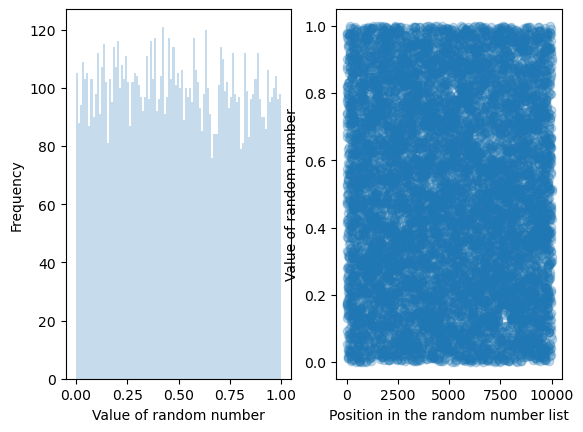

In [5]:
from matplotlib import pyplot as plt
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

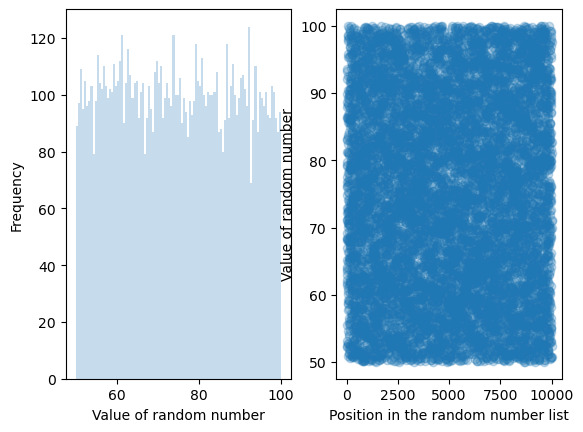

In [6]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)


fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [7]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([ 3, 86,  2, 77, 11, 51, 55, 75, 92, 64])

In [8]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [12]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: As I see it, yes.

Q: Will I be rich?
A: My reply is no.

Q: Will I be in trouble?
A: Signs point to yes.



"Don't count on it."

## 3 Flipping Coins

### 3.1 A fair coin

In [18]:
np.random.choice(['Heads', 'Tails'])

'Heads'

In [19]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Head', 'Head', 'Tails', 'Tails', 'Tails', 'Head', 'Tails',
       'Tails', 'Head', 'Tails'], dtype='<U5')

In [21]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.20%


### 3.2 A biased coin

In [30]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 72.40%


### 3.3 A flipping experiment

In [32]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats

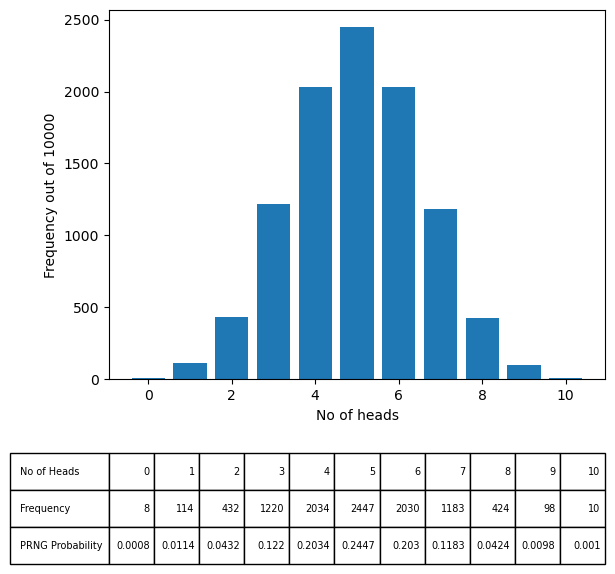

In [35]:

plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [44]:
conda install scipy

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/kai2/miniconda3

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          45 KB
    ca-certificates-2023.01.10 |       hecd8cb5_0         121 KB
    conda-23.1.0               |  py310hecd8cb5_0         948 KB
    fftw-3.3.9                 |       h9ed2024_1         2.0 MB
    scipy-1.9.3                |  py310hb4bce42_0        20.6 MB
    ------------------------------------------------------------
                                           Total:        23.8 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/osx-64::blas-1.0-openblas 
  fftw               pkgs/main/osx-64::fftw-3.3.9-h9ed2024_1 
  scipy              pkgs/main/osx-64::scipy-1.9.3-py310hb4b

In [45]:
from scipy.stats import binom
binom.pmf(k=7, n=10, p=.5)

0.11718749999999999

## Exercise 1 :  12C, 13C

In [138]:
def flip_coins(no_of_coins, probability=0.0111):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results < probability)
    return no_of_heads
no_of_coins = 27
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 3.70%


In [134]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=27) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
mean=np.sum(no_of_heads)/no_of_repeats*no_of_coins
sd=np.sqrt(np.sum((no_of_heads-mean)**2)/no_of_repeats)
print('Mean=',mean,'StdDev=',sd)

Mean= 0.027 StdDev= 0.05428042464830208


In [181]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=27) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
def prob(argh):
    aaa=[number for number in result if number==argh]
    len(aaa)
    print(len(aaa)/no_of_repeats*100,'%')
prob(0)

73.97 %
